# Example 1 - Plot sample_rms for a target over time
This example plots a timeseries of a single metric over time.

To run the example, it requires that there are sample_rms values
for 2020-10-01 through 2020-10-25 for IU.ANMO.00.BH1.M in a
database located at ./ispaq.db. To generate these values, you can run:

    ./run_ispaq.py -M sample_rms -S ANMO --starttime 2020-10-01 --endtime 2020-10-26 --output db

This example will assume that the above command has already been run and the metrics already exist.


To begin, we need to import the necessary modules:

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime

Now we need to set some variables:

In [2]:
db_name = '../ispaq.db'
metric = 'sample_rms'
startDate = '2020-10-01'
endDate = '2020-10-25'
target = 'IU.ANMO.00.BH1.M'
filename = f'example1_{target}_{startDate}_{endDate}.png'

The first step is to create a query that will be used to retrieve the sample_rms (or whatever metric you are using in the code block above).

In [3]:
SQLcommand = f"SELECT * FROM {metric} WHERE start >= '{startDate}' " \
             f"and start < '{endDate }' and (target like '{target}');"

In [4]:
print("\nCommand used to retrieve metrics from the sqlite database:")
print(SQLcommand)


Command used to retrieve metrics from the sqlite database:
SELECT * FROM sample_rms WHERE start >= '2020-10-01' and start < '2020-10-25' and (target like 'IU.ANMO.00.BH1.M');



Create a connection to the database and run the query, loading it into a pandas dataframe

In [5]:
try:
   conn = sqlite3.connect(db_name)
   DF = pd.read_sql_query(SQLcommand, conn, parse_dates=['start','end'])
   conn.close
except Exception as e:
    print(f"Unable to connect to or find the {metric} table in the database {db_name}:\n{e}")

At this point, we have created a query to retrieve the metrics from the SQLite database, used sqlite3 to connect to the database, retreieved the metrics, closed the connection, and then ensured that the start times are in a datetime format for plotting purposes. 

This is what the dataframe looks like:

In [6]:
print(DF)

              target     value      start        end               lddate
0   IU.ANMO.00.BH1.M   814.239 2020-10-01 2020-10-02  2021-03-03 16:40:48
1   IU.ANMO.00.BH1.M   392.158 2020-10-02 2020-10-03  2021-03-03 16:40:48
2   IU.ANMO.00.BH1.M   348.010 2020-10-03 2020-10-04  2021-03-03 16:40:48
3   IU.ANMO.00.BH1.M   294.118 2020-10-04 2020-10-05  2021-03-03 16:40:48
4   IU.ANMO.00.BH1.M   253.049 2020-10-05 2020-10-06  2021-03-03 16:40:48
5   IU.ANMO.00.BH1.M   250.095 2020-10-06 2020-10-07  2021-03-03 16:40:48
6   IU.ANMO.00.BH1.M   186.305 2020-10-07 2020-10-08  2021-03-03 16:40:48
7   IU.ANMO.00.BH1.M   256.112 2020-10-08 2020-10-09  2021-03-03 16:40:48
8   IU.ANMO.00.BH1.M   301.396 2020-10-09 2020-10-10  2021-03-03 16:40:48
9   IU.ANMO.00.BH1.M   415.411 2020-10-10 2020-10-11  2021-03-03 16:40:48
10  IU.ANMO.00.BH1.M   262.203 2020-10-11 2020-10-12  2021-03-03 16:40:48
11  IU.ANMO.00.BH1.M   296.688 2020-10-12 2020-10-13  2021-03-03 16:40:48
12  IU.ANMO.00.BH1.M   306.412 2020-10

For plotting purposes, we will create a new dataframe where each column (only one column in this case) is the metric and the associated values, and the index is the date of that value. 

In [7]:
plotDF = pd.DataFrame()
plotDF[metric] = DF['value']
plotDF.index=DF['start']

In [8]:
print(plotDF)

            sample_rms
start                 
2020-10-01     814.239
2020-10-02     392.158
2020-10-03     348.010
2020-10-04     294.118
2020-10-05     253.049
2020-10-06     250.095
2020-10-07     186.305
2020-10-08     256.112
2020-10-09     301.396
2020-10-10     415.411
2020-10-11     262.203
2020-10-12     296.688
2020-10-13     306.412
2020-10-14     319.377
2020-10-15     338.082
2020-10-16     357.273
2020-10-17     347.175
2020-10-18     316.444
2020-10-19    9674.820
2020-10-20     449.107
2020-10-21     191.187
2020-10-22     162.212
2020-10-23     221.976
2020-10-24     291.637


Now we use that dataframe to produce a plot.

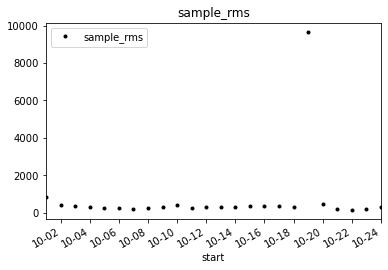

In [9]:
ax = plotDF.plot(style='.', color='k', title=metric)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.minorticks_off()
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.gcf().autofmt_xdate()

And save the plot for later viewing.

In [10]:
plt.savefig(filename)

<Figure size 432x288 with 0 Axes>